In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r2-good.csv')
dfm = pd.read_csv('wat-r2-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,15,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,24,26,8,8,1
1,39,0,1,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,19,26,7,8,1
2,78,2,0,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,18,26,6,8,1
3,79,4,0,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,17,26,5,8,1
4,80,4,0,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,16,26,4,8,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,15,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,55,59,8,8,0
1,39,0,1,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,46,59,7,8,0
2,78,2,0,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,34,59,6,8,0
3,79,4,0,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,32,59,5,8,0
4,80,4,0,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,31,59,4,8,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,15,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,24,26,8,8,1
1,39,0,1,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,19,26,7,8,1
2,78,2,0,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,18,26,6,8,1
3,79,4,0,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,17,26,5,8,1
4,80,4,0,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,16,26,4,8,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,15,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,24,26,8,8,1
36496,15,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,55,59,8,8,0
36497,39,0,1,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,46,59,7,8,0
1,39,0,1,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,19,26,7,8,1
2,78,2,0,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,18,26,6,8,1
36498,78,2,0,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,34,59,6,8,0
3,79,4,0,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,17,26,5,8,1
36499,79,4,0,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,32,59,5,8,0
36500,80,4,0,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,31,59,4,8,0
4,80,4,0,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,16,26,4,8,1


In [12]:
df.to_csv('wat-r2-pkt.csv',index=False)

In [13]:
df = pd.read_csv("wat-r2-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,15,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,24,26,8,8,1
1,15,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,55,59,8,8,0
2,39,0,1,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,46,59,7,8,0
3,39,0,1,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,19,26,7,8,1
4,78,2,0,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,18,26,6,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73709,3251380,2,4,0x1152c0,4,1,1,2,8,0,0,27,11,3251361,10026,19,26,3,4,1
73710,3251387,2,4,0x1152c0,4,2,1,2,8,0,0,27,11,3251361,10026,13,26,2,4,1
73711,3251394,2,4,0x1152c0,4,3,1,2,8,0,0,27,11,3251361,10026,7,26,1,4,1
73712,3251401,2,4,0x1152c0,4,4,2,2,8,0,0,27,11,3251361,10026,42,42,2,2,1


In [14]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,-0.050147,0.009050,0.025986,0.022600,-0.034074,-0.005828,-0.009162,-0.021736,0.001986,0.036871,0.056166,1.000000,0.982205,-0.042287,-0.072887,-0.448992,-0.541582,0.089358
outport,-0.050147,1.000000,-0.427641,-0.024043,0.015682,-0.023653,0.545426,0.588785,0.252031,-0.166593,-0.548825,-0.298834,-0.050142,-0.048693,-0.018175,-0.032123,-0.014882,0.049232,-0.004081
inport,0.009050,-0.427641,1.000000,-0.111058,-0.015059,0.022713,-0.558283,-0.605158,-0.885709,-0.658165,0.715999,0.665966,0.009045,0.013959,0.116149,0.052644,-0.052608,-0.106171,0.017374
packet_type,0.025986,-0.024043,-0.111058,1.000000,0.397470,-0.599475,-0.161787,-0.216714,0.182210,0.261015,-0.028897,-0.134085,0.025988,0.030010,0.030504,-0.026155,0.002766,-0.030030,0.007576
flit_id,0.022600,0.015682,-0.015059,0.397470,1.000000,-0.029129,0.125340,0.065580,-0.036092,0.000895,-0.043761,-0.011760,0.022595,0.023163,-0.026149,0.052021,-0.014107,0.007959,0.002946
flit_type,-0.034074,-0.023653,0.022713,-0.599475,-0.029129,1.000000,-0.189041,-0.098910,0.054435,-0.001350,0.066001,0.017737,-0.034079,-0.034935,-0.146583,0.034323,-0.032107,0.024408,-0.004443
vnet,-0.005828,0.545426,-0.558283,-0.161787,0.125340,-0.189041,1.000000,0.973712,0.325388,0.031914,-0.821994,-0.398934,-0.005822,-0.011854,-0.007997,-0.030394,0.032755,0.087942,-0.014122
vc,-0.009162,0.588785,-0.605158,-0.216714,0.065580,-0.098910,0.973712,1.000000,0.356469,0.038472,-0.831830,-0.417591,-0.009156,-0.014854,-0.025188,-0.034630,0.033157,0.095066,-0.015781
src_ni,-0.021736,0.252031,-0.885709,0.182210,-0.036092,0.054435,0.325388,0.356469,1.000000,0.852082,-0.593306,-0.702634,-0.021732,-0.024675,-0.149049,-0.031098,0.044883,0.090747,-0.016006
src_router,0.001986,-0.166593,-0.658165,0.261015,0.000895,-0.001350,0.031914,0.038472,0.852082,1.000000,-0.294929,-0.518220,0.001986,-0.000623,-0.098122,0.048287,0.059013,0.076029,-0.015164


In [15]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [16]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,2,4,0,0,3,2,8,23,7,3,0,8,8
1,2,4,0,0,3,2,8,23,7,3,0,8,8
2,0,1,1,0,3,2,8,18,2,27,0,7,8
3,0,1,1,0,3,2,8,18,2,27,0,7,8
4,2,0,2,0,3,2,8,23,7,74,0,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73709,2,4,4,1,1,2,8,27,11,3251361,10026,3,4
73710,2,4,4,2,1,2,8,27,11,3251361,10026,2,4
73711,2,4,4,3,1,2,8,27,11,3251361,10026,1,4
73712,2,4,4,4,2,2,8,27,11,3251361,10026,2,2


In [17]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.000000,0.259259,0.259259
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.000000,0.259259,0.259259
2,0.0,0.25,0.166667,0.00,1.000000,0.0,0.000000,0.580645,0.133333,0.000007,0.000000,0.222222,0.259259
3,0.0,0.25,0.166667,0.00,1.000000,0.0,0.000000,0.580645,0.133333,0.000007,0.000000,0.222222,0.259259
4,0.5,0.00,0.333333,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000022,0.000000,0.185185,0.259259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73709,0.5,1.00,0.666667,0.25,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.074074,0.111111
73710,0.5,1.00,0.666667,0.50,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.037037,0.111111
73711,0.5,1.00,0.666667,0.75,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.000000,0.111111
73712,0.5,1.00,0.666667,1.00,0.666667,0.0,0.000000,0.870968,0.733333,1.000000,0.973398,0.037037,0.037037


In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.427641,-0.024043,0.015682,-0.023653,0.545426,0.588785,-0.548825,-0.298834,-0.050142,-0.048693,-0.014882,0.049232,-0.004081
1,-0.427641,1.000000,-0.111058,-0.015059,0.022713,-0.558283,-0.605158,0.715999,0.665966,0.009045,0.013959,-0.052608,-0.106171,0.017374
2,-0.024043,-0.111058,1.000000,0.397470,-0.599475,-0.161787,-0.216714,-0.028897,-0.134085,0.025988,0.030010,0.002766,-0.030030,0.007576
3,0.015682,-0.015059,0.397470,1.000000,-0.029129,0.125340,0.065580,-0.043761,-0.011760,0.022595,0.023163,-0.014107,0.007959,0.002946
4,-0.023653,0.022713,-0.599475,-0.029129,1.000000,-0.189041,-0.098910,0.066001,0.017737,-0.034079,-0.034935,-0.032107,0.024408,-0.004443
5,0.545426,-0.558283,-0.161787,0.125340,-0.189041,1.000000,0.973712,-0.821994,-0.398934,-0.005822,-0.011854,0.032755,0.087942,-0.014122
6,0.588785,-0.605158,-0.216714,0.065580,-0.098910,0.973712,1.000000,-0.831830,-0.417591,-0.009156,-0.014854,0.033157,0.095066,-0.015781
7,-0.548825,0.715999,-0.028897,-0.043761,0.066001,-0.821994,-0.831830,1.000000,0.794247,0.036865,0.039946,-0.039509,-0.098684,0.015927
8,-0.298834,0.665966,-0.134085,-0.011760,0.017737,-0.398934,-0.417591,0.794247,1.000000,0.056162,0.055757,-0.056916,-0.085820,0.014516
9,-0.050142,0.009045,0.025988,0.022595,-0.034079,-0.005822,-0.009156,0.036865,0.056162,1.000000,0.982205,-0.448991,-0.541582,0.089358


In [19]:
train_Y = df['target']

In [20]:
train_Y

0        1
1        0
2        0
3        1
4        1
        ..
73709    1
73710    1
73711    1
73712    1
73713    1
Name: target, Length: 73714, dtype: int64

In [21]:
pca = PCA(0.95)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.50250498,  0.90290751,  0.65134506, ..., -0.07462367,
        -0.05067988, -0.07940714],
       [-0.50250498,  0.90290751,  0.65134506, ..., -0.07462367,
        -0.05067988, -0.07940714],
       [-0.15793943,  0.85483914,  0.53570166, ..., -0.50868115,
        -0.32500653,  0.13654085],
       ...,
       [-0.61923226, -0.71315863, -0.24105569, ...,  0.12841876,
         0.10753738,  0.1074715 ],
       [-0.62716256, -0.71560615, -0.2699686 , ..., -0.22170512,
         0.13421411,  0.09829144],
       [-0.64816414, -0.50117244,  0.92780755, ..., -0.03367117,
        -0.01024183,  0.09686854]])

In [24]:
pca.explained_variance_ratio_

array([0.39489145, 0.15897147, 0.12744297, 0.09700749, 0.0921996 ,
       0.06533512, 0.03659986])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

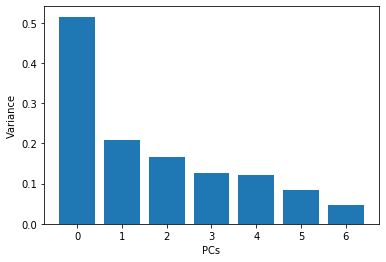

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,-0.502505,0.902908,0.651345,-0.344224,-0.074624,-0.050680,-0.079407
1,-0.502505,0.902908,0.651345,-0.344224,-0.074624,-0.050680,-0.079407
2,-0.157939,0.854839,0.535702,0.382748,-0.508681,-0.325007,0.136541
3,-0.157939,0.854839,0.535702,0.382748,-0.508681,-0.325007,0.136541
4,-0.000116,0.840460,0.508669,0.206667,-0.357379,0.143688,0.546290
...,...,...,...,...,...,...,...
73709,-0.639074,-0.645090,0.116862,-0.191790,0.363648,0.118879,0.102474
73710,-0.629153,-0.679124,-0.062097,-0.299044,0.246033,0.113208,0.104973
73711,-0.619232,-0.713159,-0.241056,-0.406297,0.128419,0.107537,0.107472
73712,-0.627163,-0.715606,-0.269969,-0.609077,-0.221705,0.134214,0.098291


In [28]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,target
0,-0.502505,0.902908,0.651345,-0.344224,-0.074624,-0.050680,-0.079407,1
1,-0.502505,0.902908,0.651345,-0.344224,-0.074624,-0.050680,-0.079407,0
2,-0.157939,0.854839,0.535702,0.382748,-0.508681,-0.325007,0.136541,0
3,-0.157939,0.854839,0.535702,0.382748,-0.508681,-0.325007,0.136541,1
4,-0.000116,0.840460,0.508669,0.206667,-0.357379,0.143688,0.546290,1
...,...,...,...,...,...,...,...,...
73709,-0.639074,-0.645090,0.116862,-0.191790,0.363648,0.118879,0.102474,1
73710,-0.629153,-0.679124,-0.062097,-0.299044,0.246033,0.113208,0.104973,1
73711,-0.619232,-0.713159,-0.241056,-0.406297,0.128419,0.107537,0.107472,1
73712,-0.627163,-0.715606,-0.269969,-0.609077,-0.221705,0.134214,0.098291,1


In [29]:
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,3.810510e-16,6.119580e-16,1.995887e-15,-1.527980e-15,1.114816e-14,1.995784e-15,-0.017913
1,3.810510e-16,1.000000e+00,1.274120e-15,-5.002748e-16,5.581857e-16,-4.261334e-16,-2.250414e-16,-0.049388
2,6.119580e-16,1.274120e-15,1.000000e+00,1.736793e-16,6.990233e-16,1.469968e-15,-4.923864e-16,0.003803
3,1.995887e-15,-5.002748e-16,1.736793e-16,1.000000e+00,-1.088289e-15,-5.724096e-15,3.723642e-15,-0.005895
4,-1.527980e-15,5.581857e-16,6.990233e-16,-1.088289e-15,1.000000e+00,4.894632e-15,-3.138321e-15,0.005371
5,1.114816e-14,-4.261334e-16,1.469968e-15,-5.724096e-15,4.894632e-15,1.000000e+00,-5.713786e-16,0.013217
6,1.995784e-15,-2.250414e-16,-4.923864e-16,3.723642e-15,-3.138321e-15,-5.713786e-16,1.000000e+00,-0.009164
target,-1.791294e-02,-4.938800e-02,3.803222e-03,-5.894917e-03,5.370621e-03,1.321701e-02,-9.163570e-03,1.000000


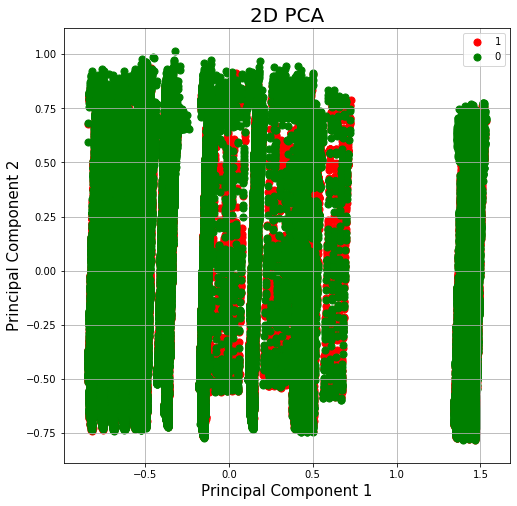

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,2,4,0,0,3,2,8,0,0,23,7,3,0,24,26,8,8,1
1,2,4,0,0,3,2,8,0,0,23,7,3,0,55,59,8,8,0
2,0,1,1,0,3,2,8,23,7,18,2,27,0,46,59,7,8,0
3,0,1,1,0,3,2,8,23,7,18,2,27,0,19,26,7,8,1
4,2,0,2,0,3,2,8,18,2,23,7,74,0,18,26,6,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73709,2,4,4,1,1,2,8,0,0,27,11,3251361,10026,19,26,3,4,1
73710,2,4,4,2,1,2,8,0,0,27,11,3251361,10026,13,26,2,4,1
73711,2,4,4,3,1,2,8,0,0,27,11,3251361,10026,7,26,1,4,1
73712,2,4,4,4,2,2,8,0,0,27,11,3251361,10026,42,42,2,2,1


In [32]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [33]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [34]:
seed = 7
np.random.seed(seed)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [48]:
model = Sequential()

In [49]:
n_cols = train_X.shape[1]
n_cols

13

In [50]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [53]:
model.fit(x_train, y_train, epochs=50, validation_split=0.4)

Train on 30075 samples, validate on 20050 samples
Epoch 1/50
30075/30075 [==============================] - 3s 114us/step - loss: 0.0823 - accuracy: 0.8916 - val_loss: 0.0766 - val_accuracy: 0.9030
Epoch 2/50
30075/30075 [==============================] - 3s 110us/step - loss: 0.0808 - accuracy: 0.8948 - val_loss: 0.0784 - val_accuracy: 0.9061
Epoch 3/50
30075/30075 [==============================] - 3s 112us/step - loss: 0.0807 - accuracy: 0.8949 - val_loss: 0.0815 - val_accuracy: 0.8973
Epoch 4/50
30075/30075 [==============================] - 3s 112us/step - loss: 0.0797 - accuracy: 0.8978 - val_loss: 0.2588 - val_accuracy: 0.6588
Epoch 5/50
30075/30075 [==============================] - 4s 128us/step - loss: 0.0795 - accuracy: 0.8991 - val_loss: 0.0811 - val_accuracy: 0.8984
Epoch 6/50
30075/30075 [==============================] - 4s 120us/step - loss: 0.0792 - accuracy: 0.8986 - val_loss: 0.0719 - val_accuracy: 0.9212
Epoch 7/50
30075/30075 [==============================] - 3s 1

In [54]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [55]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.57%


In [83]:
dff = pd.read_csv('wat-r2-pkt.csv',nrows=500)

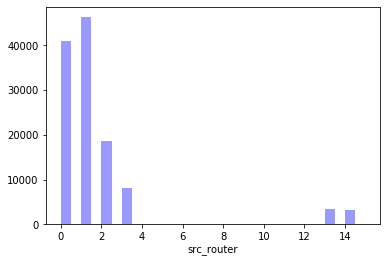

In [84]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

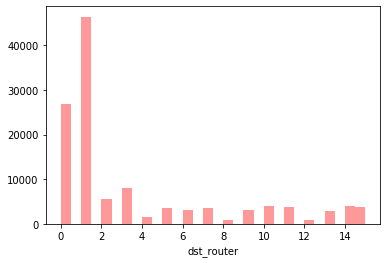

In [85]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

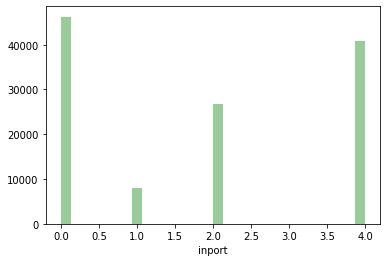

In [86]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

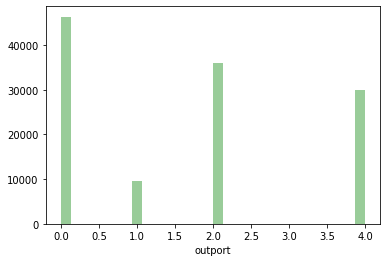

In [87]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

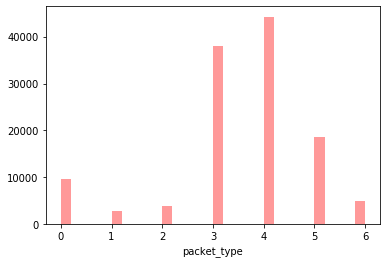

In [88]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')